# Homework 3

## Problem 3
Perform wavelet compression on the 1D signal below and compare your results to DCT.

In previous HW\#2, we have used a step function. In this one, you will use the following 1D Gaussian curve as input and practice compression (1:2, 1:4, 1:8, 1:16) using dwt.

Note that the dwt and idwt function in Matlab only performs 1st stage wavelet transform. How do you perform 2-stage or 3-stage wavelet transform to achieve compression ratio of 1:4 or 1:8? 

Matlab code for creating a vector of dimension 1024 of a normal distribution with $\mu$ = 50 and $\sigma$ = 10:

```
x = 0:0.1:102.3 ;
f = normpdf(x,50, 10);
figure(1)
plot(f,'LineWidth',4) ;
title ('original signal') ;
```

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


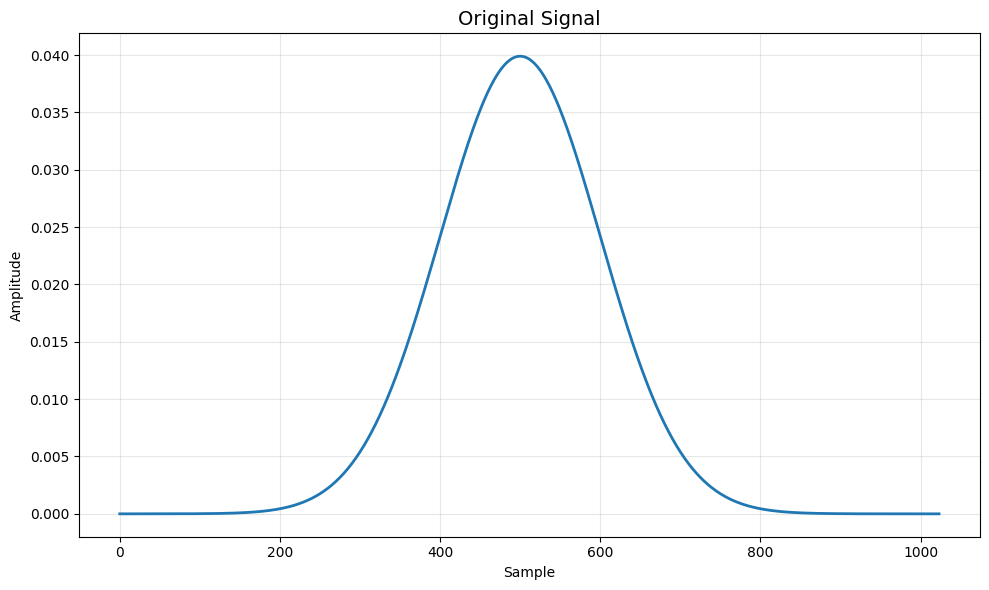

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


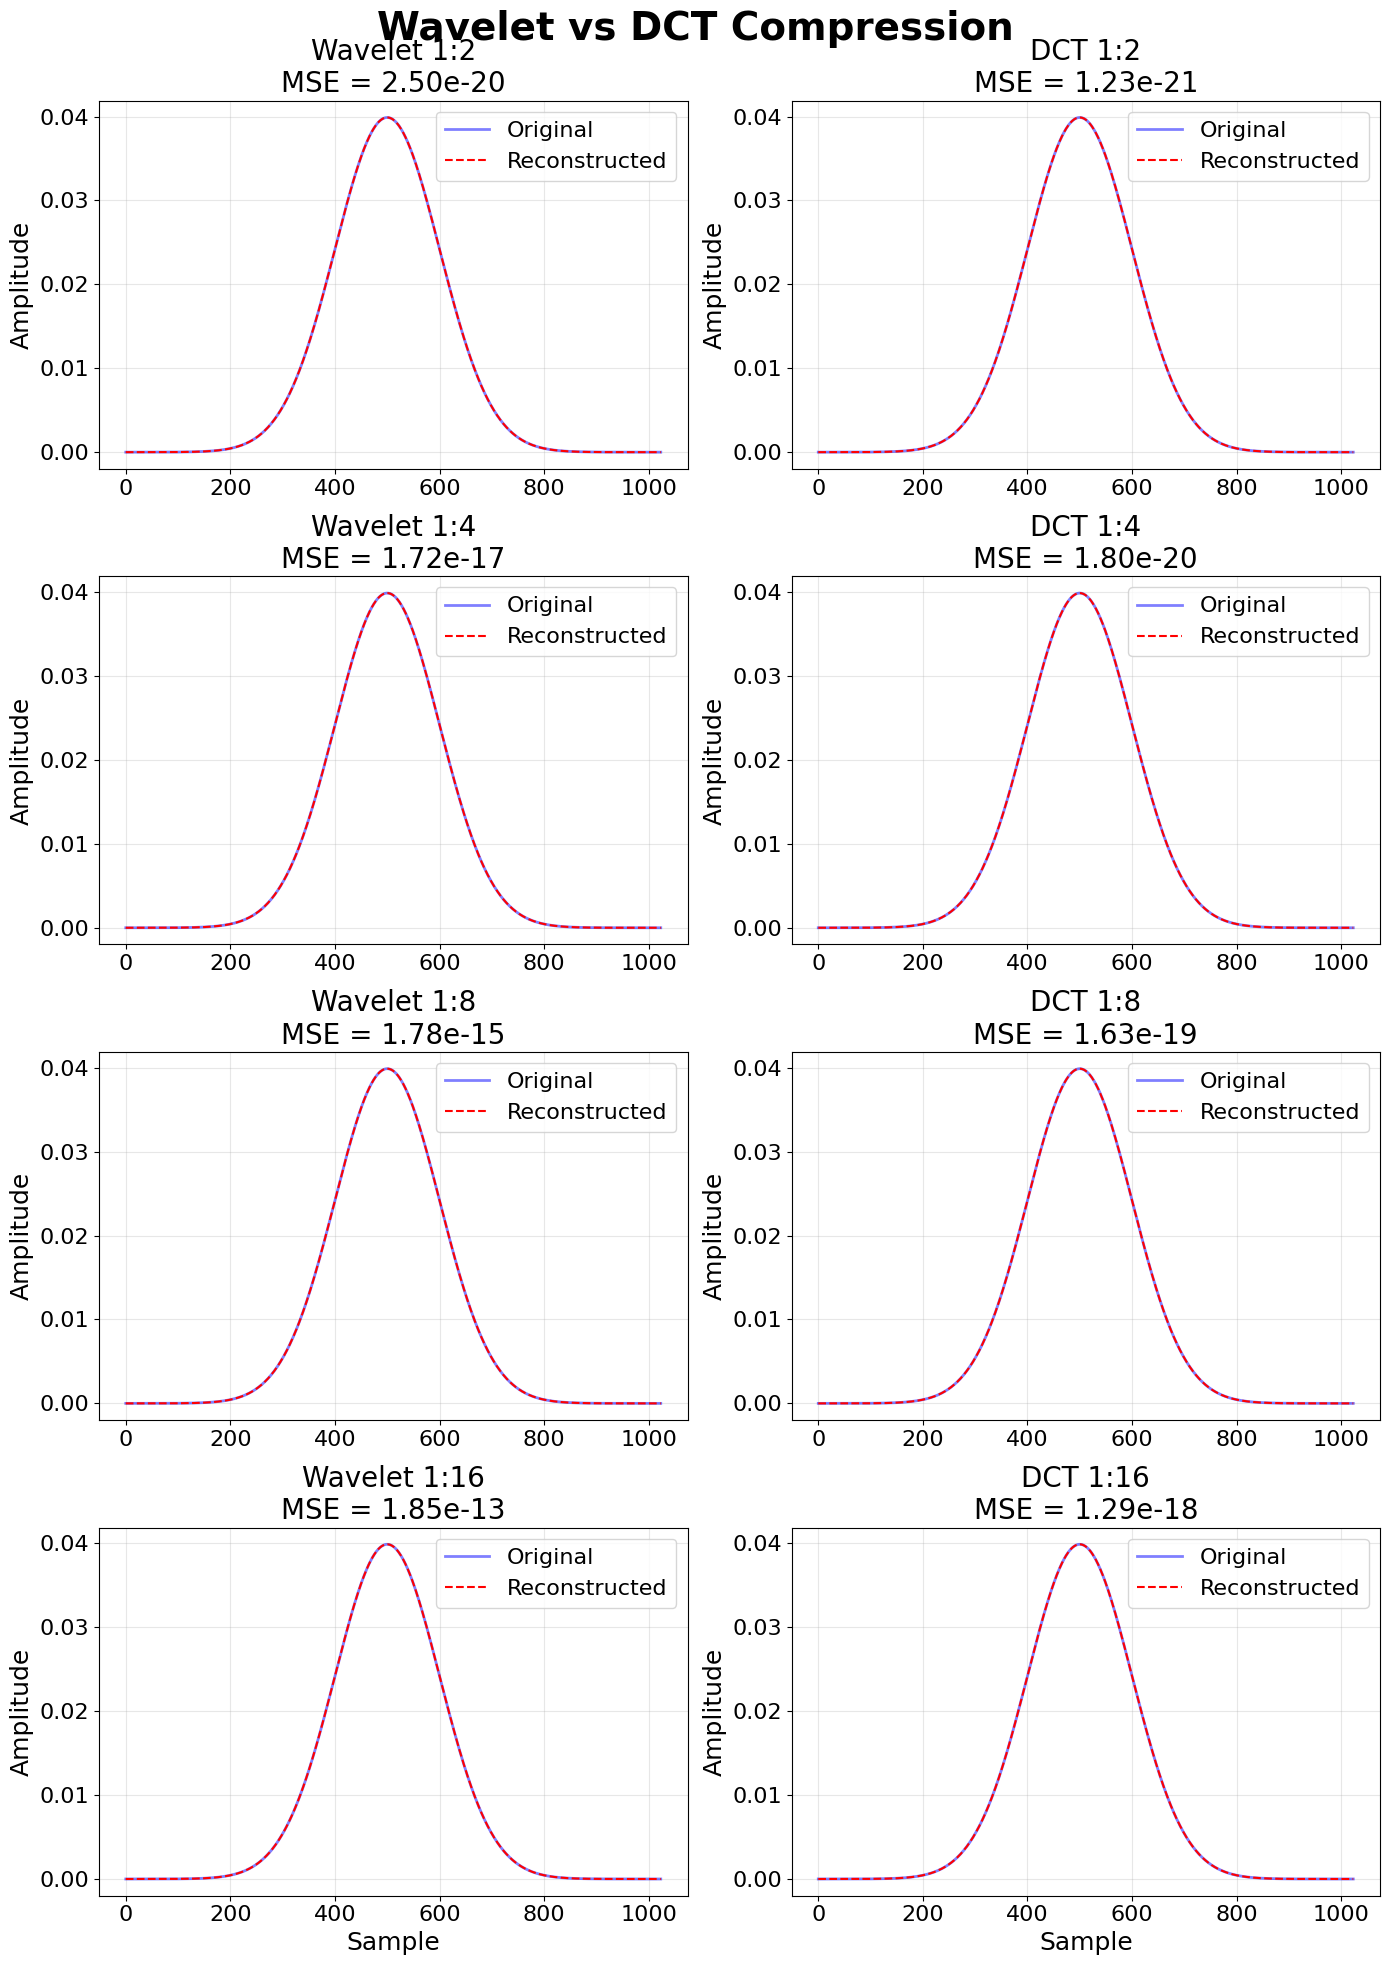

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


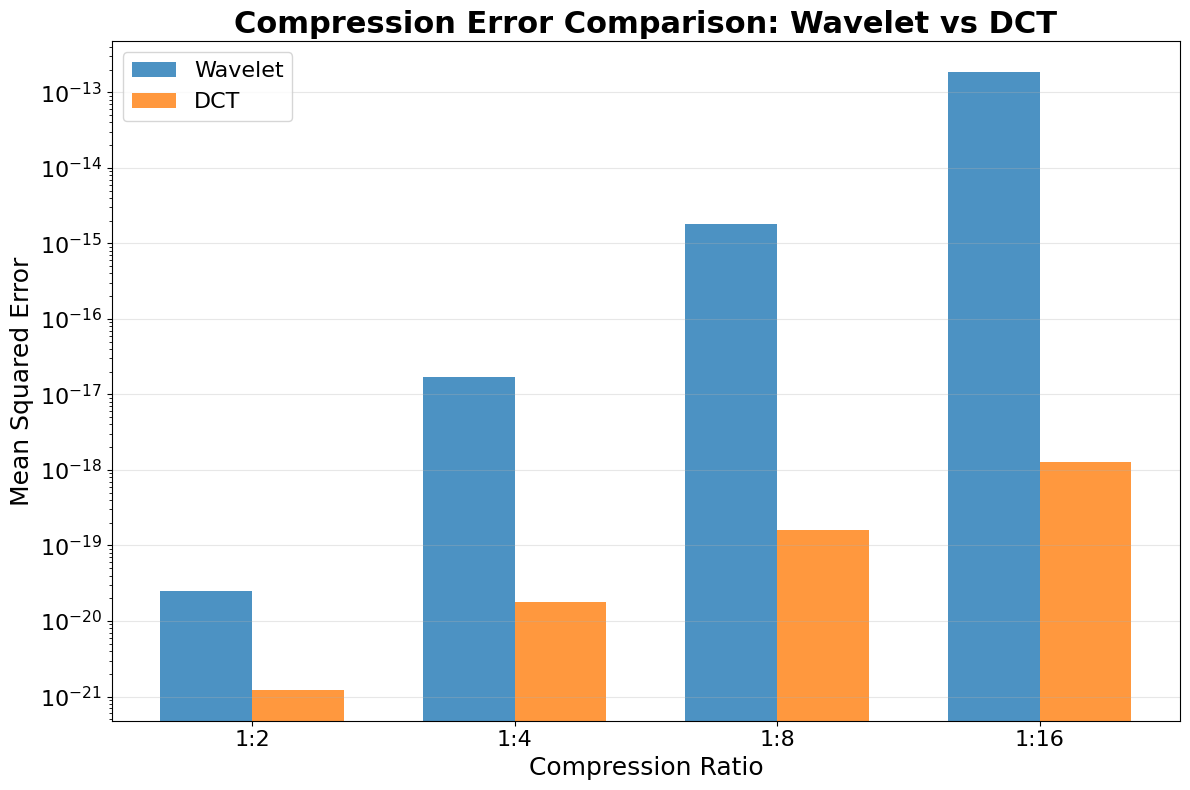

COMPRESSION RESULTS SUMMARY
Ratio      Wavelet MSE          DCT MSE             
------------------------------------------------------------
1:2       0.00000000           0.00000000          
1:4       0.00000000           0.00000000          
1:8       0.00000000           0.00000000          
1:16      0.00000000           0.00000000          


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import dct, idct
from scipy.stats import norm
import os

# Create figures directory if it doesn't exist
os.makedirs('figures', exist_ok=True)

# Create the 1D Gaussian signal (1024 points)
x = np.linspace(0, 102.3, 1024)
f = norm.pdf(x, loc=50, scale=10)

# Plot original signal
plt.figure(figsize=(10, 6))
plt.plot(f, linewidth=2)
plt.title('Original Signal', fontsize=14)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/original_signal.eps', format='eps', dpi=300)
plt.show()

# Compression ratios
compression_ratios = [2, 4, 8, 16]
wavelet = 'db4'  # Daubechies 4 wavelet

# Function to perform multi-level DWT compression
def wavelet_compress(signal, compression_ratio, wavelet='db4'):
    """
    Compress signal using multi-level wavelet decomposition
    compression_ratio: 2, 4, 8, 16 (corresponds to 1:2, 1:4, 1:8, 1:16)
    """
    # Determine decomposition level
    level = int(np.log2(compression_ratio))
    
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Calculate number of coefficients to keep
    total_coeffs = sum(len(c) for c in coeffs)
    keep_coeffs = total_coeffs // compression_ratio
    
    # Flatten all coefficients
    all_coeffs = np.concatenate([coeffs[0]] + coeffs[1:])
    
    # Keep only the largest coefficients (by magnitude)
    threshold = np.sort(np.abs(all_coeffs))[-keep_coeffs]
    
    # Zero out small coefficients
    compressed_coeffs = []
    idx = 0
    for i, c in enumerate(coeffs):
        coeff_copy = c.copy()
        for j in range(len(c)):
            if np.abs(all_coeffs[idx]) < threshold:
                coeff_copy[j] = 0
            idx += 1
        compressed_coeffs.append(coeff_copy)
    
    # Reconstruct signal
    reconstructed = pywt.waverec(compressed_coeffs, wavelet)
    
    # Ensure same length as original
    return reconstructed[:len(signal)]

# Function to perform DCT compression
def dct_compress(signal, compression_ratio):
    """
    Compress signal using DCT
    """
    # Forward DCT
    dct_coeffs = dct(signal, norm='ortho')
    
    # Keep only top coefficients
    keep_coeffs = len(signal) // compression_ratio
    
    # Find threshold
    threshold = np.sort(np.abs(dct_coeffs))[-keep_coeffs]
    
    # Zero out small coefficients
    compressed_coeffs = dct_coeffs.copy()
    compressed_coeffs[np.abs(compressed_coeffs) < threshold] = 0
    
    # Inverse DCT
    reconstructed = idct(compressed_coeffs, norm='ortho')
    
    return reconstructed

# Perform compression and plot results
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
fig.suptitle('Wavelet vs DCT Compression', fontsize=28, fontweight='bold')

for idx, ratio in enumerate(compression_ratios):
    # Wavelet compression
    f_wavelet = wavelet_compress(f, ratio, wavelet)
    error_wavelet = np.mean((f - f_wavelet)**2)
    
    # DCT compression
    f_dct = dct_compress(f, ratio)
    error_dct = np.mean((f - f_dct)**2)
    
    # Plot wavelet result (left column)
    axes[idx, 0].plot(f, 'b-', linewidth=2, label='Original', alpha=0.5)
    axes[idx, 0].plot(f_wavelet, 'r--', linewidth=1.5, label='Reconstructed')
    axes[idx, 0].set_title(f'Wavelet 1:{ratio}\nMSE = {error_wavelet:.2e}', fontsize=20)
    axes[idx, 0].legend(fontsize=16)
    axes[idx, 0].grid(True, alpha=0.3)
    axes[idx, 0].set_ylabel('Amplitude', fontsize=18)
    axes[idx, 0].tick_params(axis='both', labelsize=16)
    if idx == 3:
        axes[idx, 0].set_xlabel('Sample', fontsize=18)
    
    # Plot DCT result (right column)
    axes[idx, 1].plot(f, 'b-', linewidth=2, label='Original', alpha=0.5)
    axes[idx, 1].plot(f_dct, 'r--', linewidth=1.5, label='Reconstructed')
    axes[idx, 1].set_title(f'DCT 1:{ratio}\nMSE = {error_dct:.2e}', fontsize=20)
    axes[idx, 1].legend(fontsize=16)
    axes[idx, 1].grid(True, alpha=0.3)
    axes[idx, 1].set_ylabel('Amplitude', fontsize=18)
    axes[idx, 1].tick_params(axis='both', labelsize=16)
    if idx == 3:
        axes[idx, 1].set_xlabel('Sample', fontsize=18)

plt.tight_layout()
plt.savefig('figures/wavelet_vs_dct_compression.eps', format='eps', dpi=300)
plt.show()

# Create error comparison plot
fig, ax = plt.subplots(figsize=(12, 8))

mse_wavelet = []
mse_dct = []

for ratio in compression_ratios:
    f_wavelet = wavelet_compress(f, ratio, wavelet)
    f_dct = dct_compress(f, ratio)
    
    mse_wavelet.append(np.mean((f - f_wavelet)**2))
    mse_dct.append(np.mean((f - f_dct)**2))

x_pos = np.arange(len(compression_ratios))
width = 0.35

bars1 = ax.bar(x_pos - width/2, mse_wavelet, width, label='Wavelet', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, mse_dct, width, label='DCT', alpha=0.8)

ax.set_xlabel('Compression Ratio', fontsize=18)
ax.set_ylabel('Mean Squared Error', fontsize=18)
ax.set_title('Compression Error Comparison: Wavelet vs DCT', fontsize=22, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'1:{r}' for r in compression_ratios])
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=16)
ax.grid(True, alpha=0.3, axis='y')
ax.set_yscale('log')

plt.tight_layout()
plt.savefig('figures/compression_error_comparison.eps', format='eps', dpi=300)
plt.show()

# Print summary statistics
print("=" * 60)
print("COMPRESSION RESULTS SUMMARY")
print("=" * 60)
print(f"{'Ratio':<10} {'Wavelet MSE':<20} {'DCT MSE':<20}")
print("-" * 60)
for i, ratio in enumerate(compression_ratios):
    print(f"1:{ratio:<7} {mse_wavelet[i]:<20.8f} {mse_dct[i]:<20.8f}")
print("=" * 60)

## Problem 4
Consider the same signal $z$ as in problem 3. Use Matlab functions \texttt{normrand} or \texttt{wgn} to add Gaussian noise to the input signal. Use wavelet transform and Fourier transform to remove the noise and compare the results.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Signal-to-Noise Ratio: 10.61 dB
Noise standard deviation: 0.005

DENOISING RESULTS
MSE (Noisy):            2.393778e-05
MSE (Wavelet Denoised): 7.902834e-07  (Improvement: 30.29x)
MSE (Fourier Denoised): 9.784785e-06  (Improvement: 2.45x)


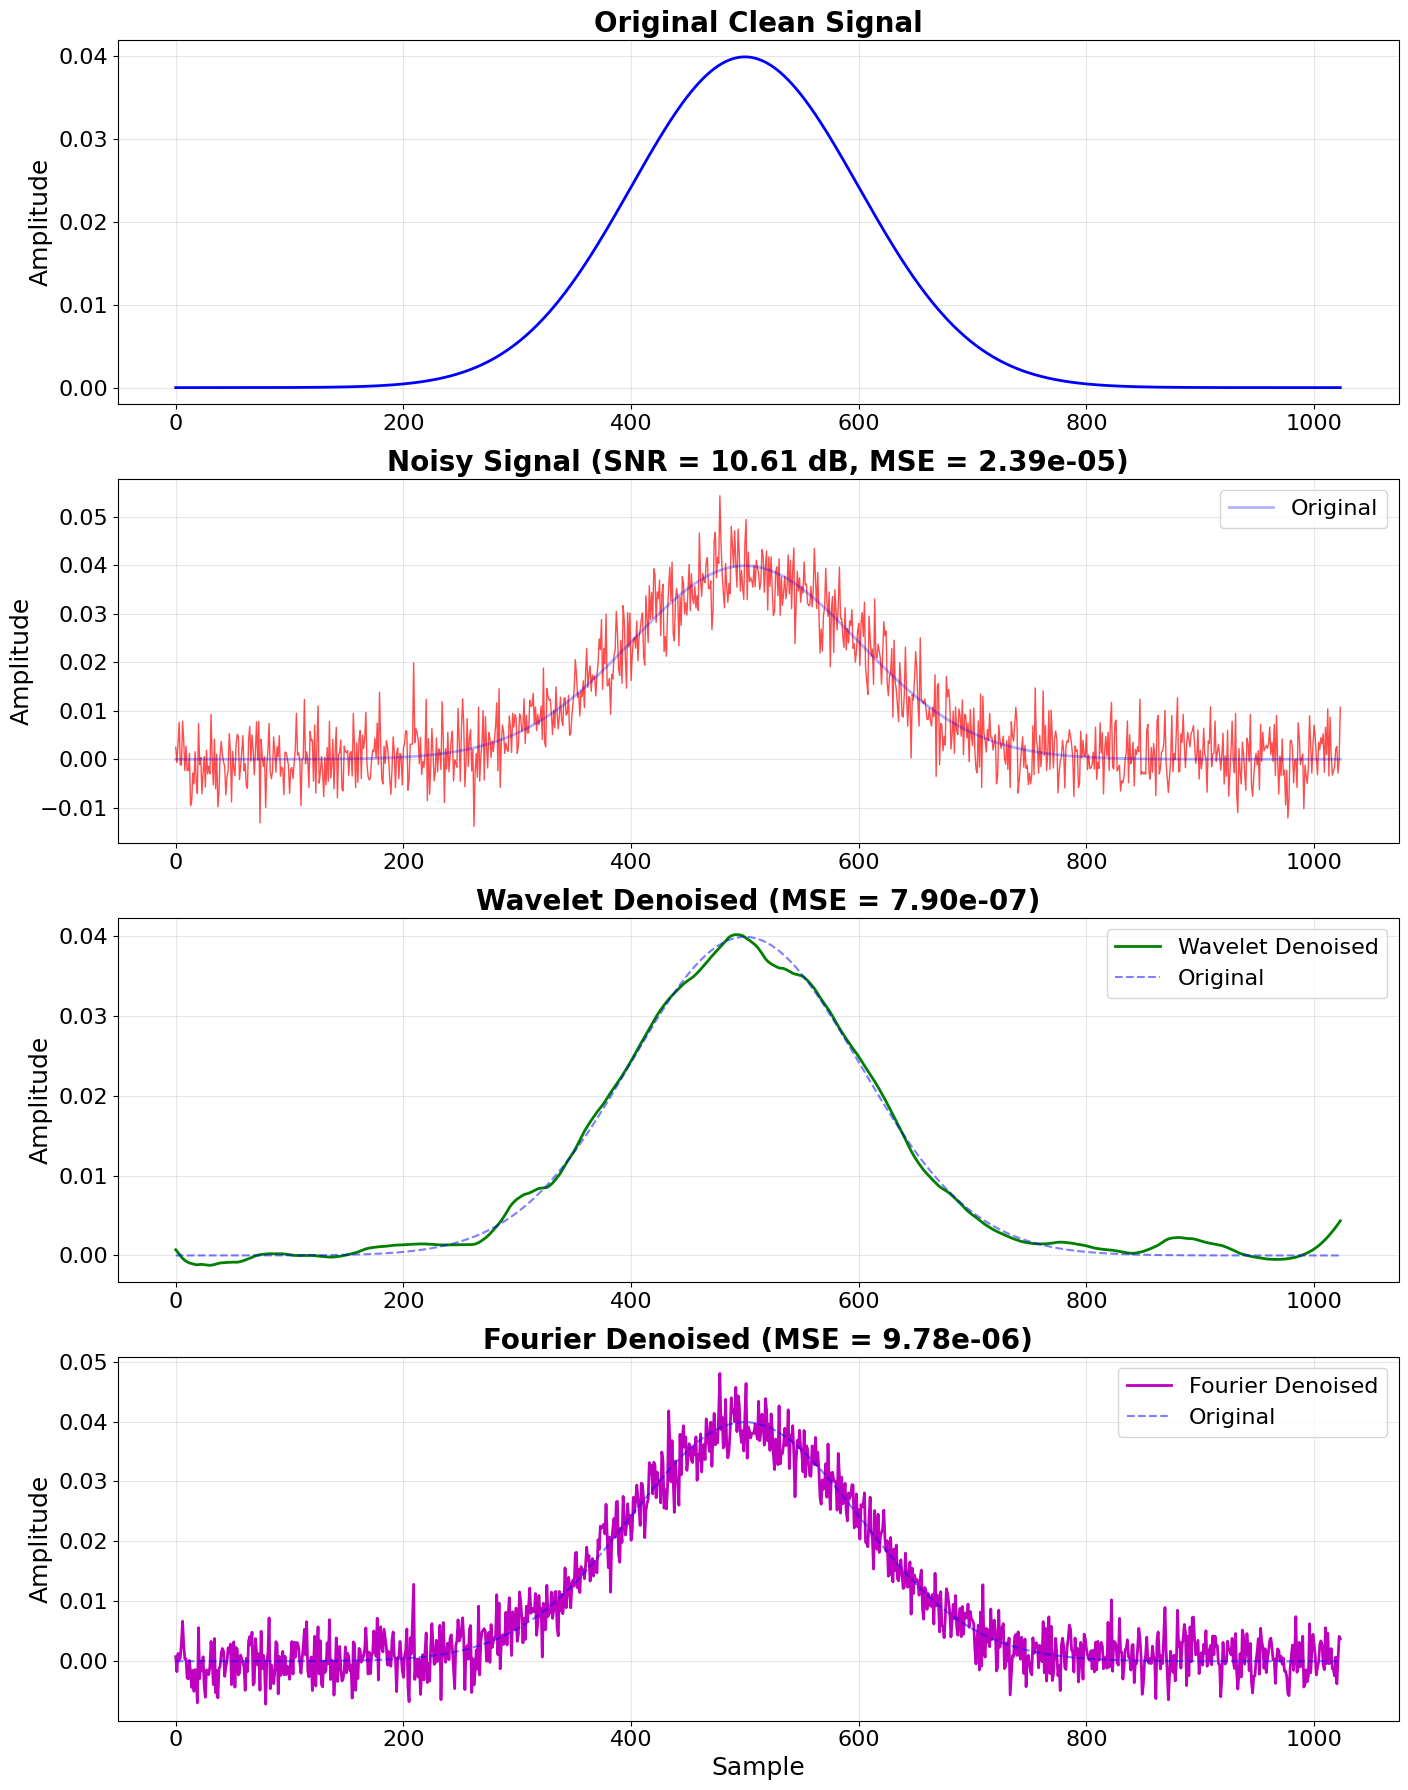

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


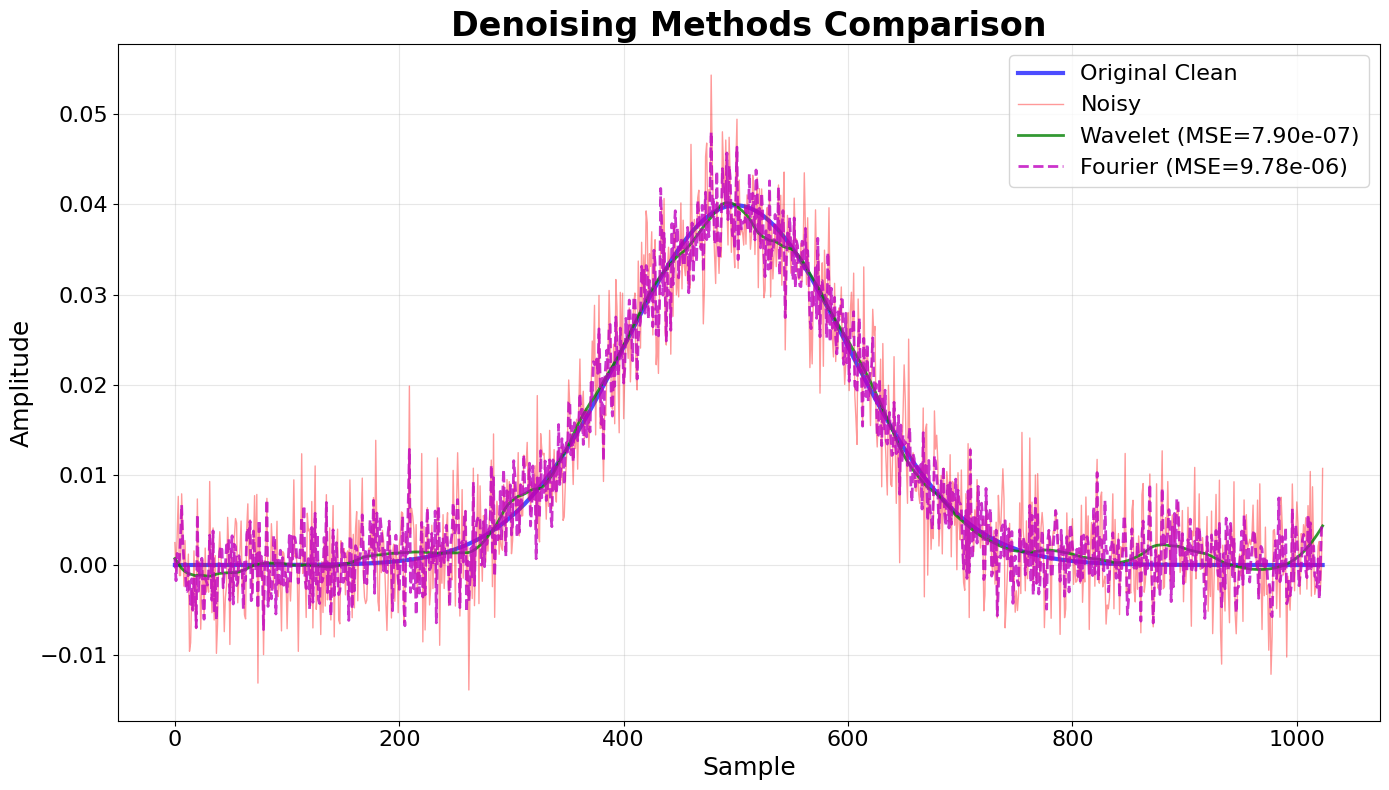

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


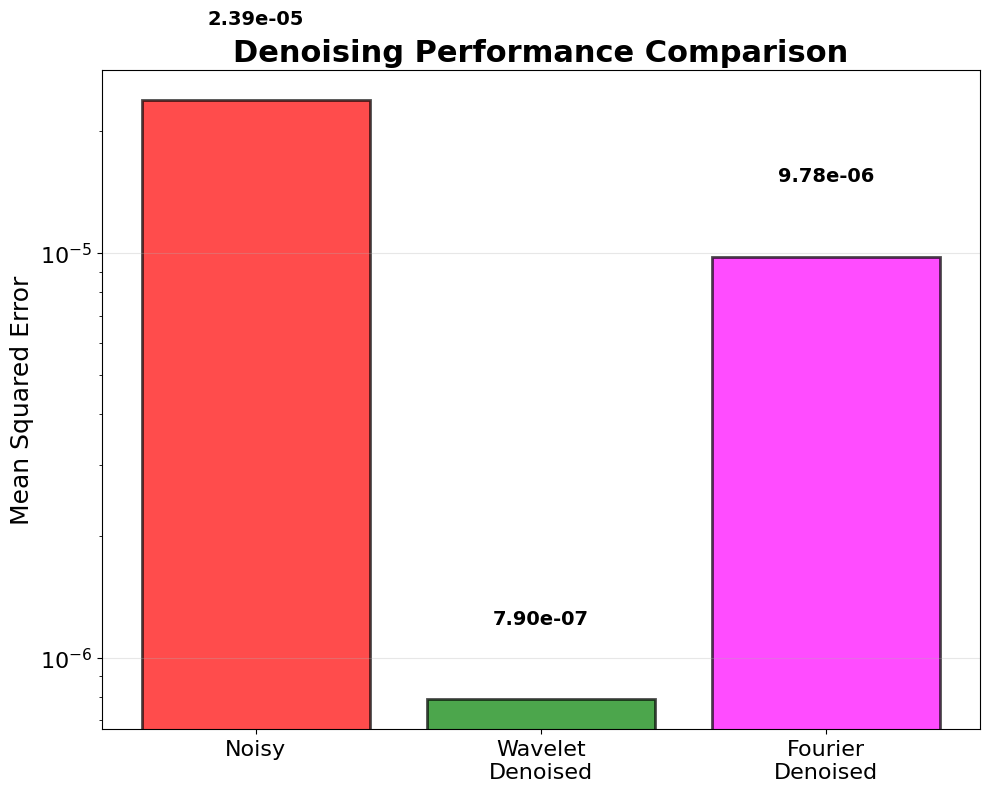

In [9]:
# Problem 4: Noise Removal using Wavelet and Fourier Transforms
# Use the same Gaussian signal from Problem 3
signal_clean = f.copy()

# Add Gaussian noise (similar to MATLAB's wgn or normrnd)
np.random.seed(42)  # For reproducibility
noise_level = 0.005  # Standard deviation of noise
noise = np.random.normal(0, noise_level, len(signal_clean))
signal_noisy = signal_clean + noise

# Calculate SNR
signal_power = np.mean(signal_clean**2)
noise_power = np.mean(noise**2)
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"Signal-to-Noise Ratio: {snr_db:.2f} dB")
print(f"Noise standard deviation: {noise_level}")

# Wavelet denoising function
def wavelet_denoise(signal, wavelet='db4', level=4, threshold_scale=1.0):
    """
    Denoise signal using wavelet soft thresholding
    """
    # Decompose signal
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Calculate threshold using universal threshold (VisuShrink)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745  # Robust estimate of noise
    threshold = threshold_scale * sigma * np.sqrt(2 * np.log(len(signal)))
    
    # Apply soft thresholding to detail coefficients
    coeffs_thresh = [coeffs[0]]  # Keep approximation coefficients
    for i in range(1, len(coeffs)):
        coeffs_thresh.append(pywt.threshold(coeffs[i], threshold, mode='soft'))
    
    # Reconstruct signal
    denoised = pywt.waverec(coeffs_thresh, wavelet)
    return denoised[:len(signal)]

# Fourier denoising function
def fourier_denoise(signal, cutoff_percentile=90):
    """
    Denoise signal using Fourier transform by removing high-frequency components
    """
    # Forward FFT
    fft_coeffs = np.fft.fft(signal)
    
    # Calculate threshold based on magnitude
    magnitudes = np.abs(fft_coeffs)
    threshold = np.percentile(magnitudes, cutoff_percentile)
    
    # Zero out small coefficients (soft thresholding in frequency domain)
    fft_thresh = fft_coeffs.copy()
    fft_thresh[magnitudes < threshold] = 0
    
    # Inverse FFT
    denoised = np.fft.ifft(fft_thresh).real
    return denoised

# Apply denoising methods
signal_wavelet_denoised = wavelet_denoise(signal_noisy, wavelet='db4', level=5)
signal_fourier_denoised = fourier_denoise(signal_noisy, cutoff_percentile=85)

# Calculate MSE for each method
mse_noisy = np.mean((signal_clean - signal_noisy)**2)
mse_wavelet = np.mean((signal_clean - signal_wavelet_denoised)**2)
mse_fourier = np.mean((signal_clean - signal_fourier_denoised)**2)

# Calculate improvement factors
improvement_wavelet = mse_noisy / mse_wavelet
improvement_fourier = mse_noisy / mse_fourier

print("\n" + "=" * 60)
print("DENOISING RESULTS")
print("=" * 60)
print(f"MSE (Noisy):            {mse_noisy:.6e}")
print(f"MSE (Wavelet Denoised): {mse_wavelet:.6e}  (Improvement: {improvement_wavelet:.2f}x)")
print(f"MSE (Fourier Denoised): {mse_fourier:.6e}  (Improvement: {improvement_fourier:.2f}x)")
print("=" * 60)

# Create visualization
fig, axes = plt.subplots(4, 1, figsize=(14, 18))

# Plot 1: Original clean signal
axes[0].plot(signal_clean, 'b-', linewidth=2)
axes[0].set_title('Original Clean Signal', fontsize=20, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=18)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='both', labelsize=16)

# Plot 2: Noisy signal
axes[1].plot(signal_noisy, 'r-', linewidth=1, alpha=0.7)
axes[1].plot(signal_clean, 'b-', linewidth=2, alpha=0.3, label='Original')
axes[1].set_title(f'Noisy Signal (SNR = {snr_db:.2f} dB, MSE = {mse_noisy:.2e})', fontsize=20, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=18)
axes[1].legend(fontsize=16)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='both', labelsize=16)

# Plot 3: Wavelet denoised
axes[2].plot(signal_wavelet_denoised, 'g-', linewidth=2, label='Wavelet Denoised')
axes[2].plot(signal_clean, 'b--', linewidth=1.5, alpha=0.5, label='Original')
axes[2].set_title(f'Wavelet Denoised (MSE = {mse_wavelet:.2e})', fontsize=20, fontweight='bold')
axes[2].set_ylabel('Amplitude', fontsize=18)
axes[2].legend(fontsize=16)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='both', labelsize=16)

# Plot 4: Fourier denoised
axes[3].plot(signal_fourier_denoised, 'm-', linewidth=2, label='Fourier Denoised')
axes[3].plot(signal_clean, 'b--', linewidth=1.5, alpha=0.5, label='Original')
axes[3].set_title(f'Fourier Denoised (MSE = {mse_fourier:.2e})', fontsize=20, fontweight='bold')
axes[3].set_xlabel('Sample', fontsize=18)
axes[3].set_ylabel('Amplitude', fontsize=18)
axes[3].legend(fontsize=16)
axes[3].grid(True, alpha=0.3)
axes[3].tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.savefig('figures/denoising_comparison.eps', format='eps', dpi=300)
plt.show()

# Create comparison plot showing all methods together
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(signal_clean, 'b-', linewidth=3, label='Original Clean', alpha=0.7)
ax.plot(signal_noisy, 'r-', linewidth=1, label='Noisy', alpha=0.4)
ax.plot(signal_wavelet_denoised, 'g-', linewidth=2, label=f'Wavelet (MSE={mse_wavelet:.2e})', alpha=0.8)
ax.plot(signal_fourier_denoised, 'm--', linewidth=2, label=f'Fourier (MSE={mse_fourier:.2e})', alpha=0.8)

ax.set_title('Denoising Methods Comparison', fontsize=24, fontweight='bold')
ax.set_xlabel('Sample', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
ax.legend(fontsize=16, loc='upper right')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.savefig('figures/denoising_overlay.eps', format='eps', dpi=300)
plt.show()

# Create MSE comparison bar chart
fig, ax = plt.subplots(figsize=(10, 8))

methods = ['Noisy', 'Wavelet\nDenoised', 'Fourier\nDenoised']
mse_values = [mse_noisy, mse_wavelet, mse_fourier]
colors = ['red', 'green', 'magenta']

bars = ax.bar(methods, mse_values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

ax.set_ylabel('Mean Squared Error', fontsize=18)
ax.set_title('Denoising Performance Comparison', fontsize=22, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3, axis='y')
ax.tick_params(axis='both', labelsize=16)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, mse_values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * 1.5,
            f'{val:.2e}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/denoising_mse_comparison.eps', format='eps', dpi=300)
plt.show()

## Problem 5
In this problem you will practice with 2D transforms for image compression. Please create your own image and perform compression using 2D transforms such as fft2, dct2, and dwt2.

Hints:
- You will need functions imread and imshow to read in an image and display an image.
- You may also consider concerting your RGB images into a gray level images first using rgb2gray.


Image shape: (345, 345)
Image dtype: float64


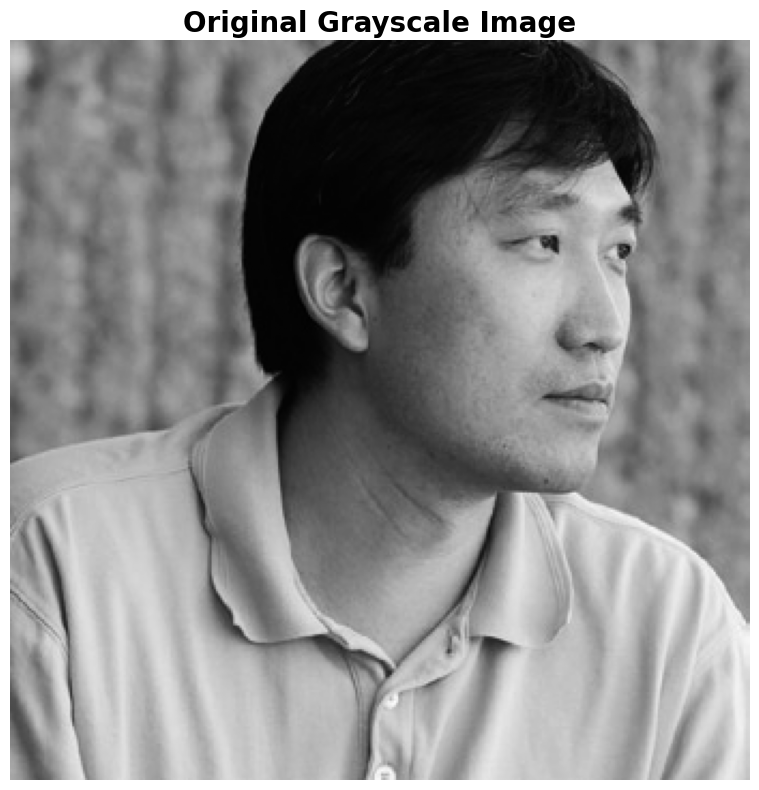


2D IMAGE COMPRESSION RESULTS SUMMARY
Ratio      Method     MSE             PSNR (dB)       Coeffs Kept    
--------------------------------------------------------------------------------
1:4        FFT        7.23            39.54           29756          
           DCT        4.58            41.52           29756          
           Wavelet    0.87            48.74           34596          
--------------------------------------------------------------------------------
1:16       FFT        35.60           32.62           7439           
           DCT        25.05           34.14           7439           
           Wavelet    9.88            38.18           8649           
--------------------------------------------------------------------------------
1:64       FFT        110.16          27.71           1859           
           DCT        78.53           29.18           1859           
           Wavelet    67.21           29.86           2162           
-------------------

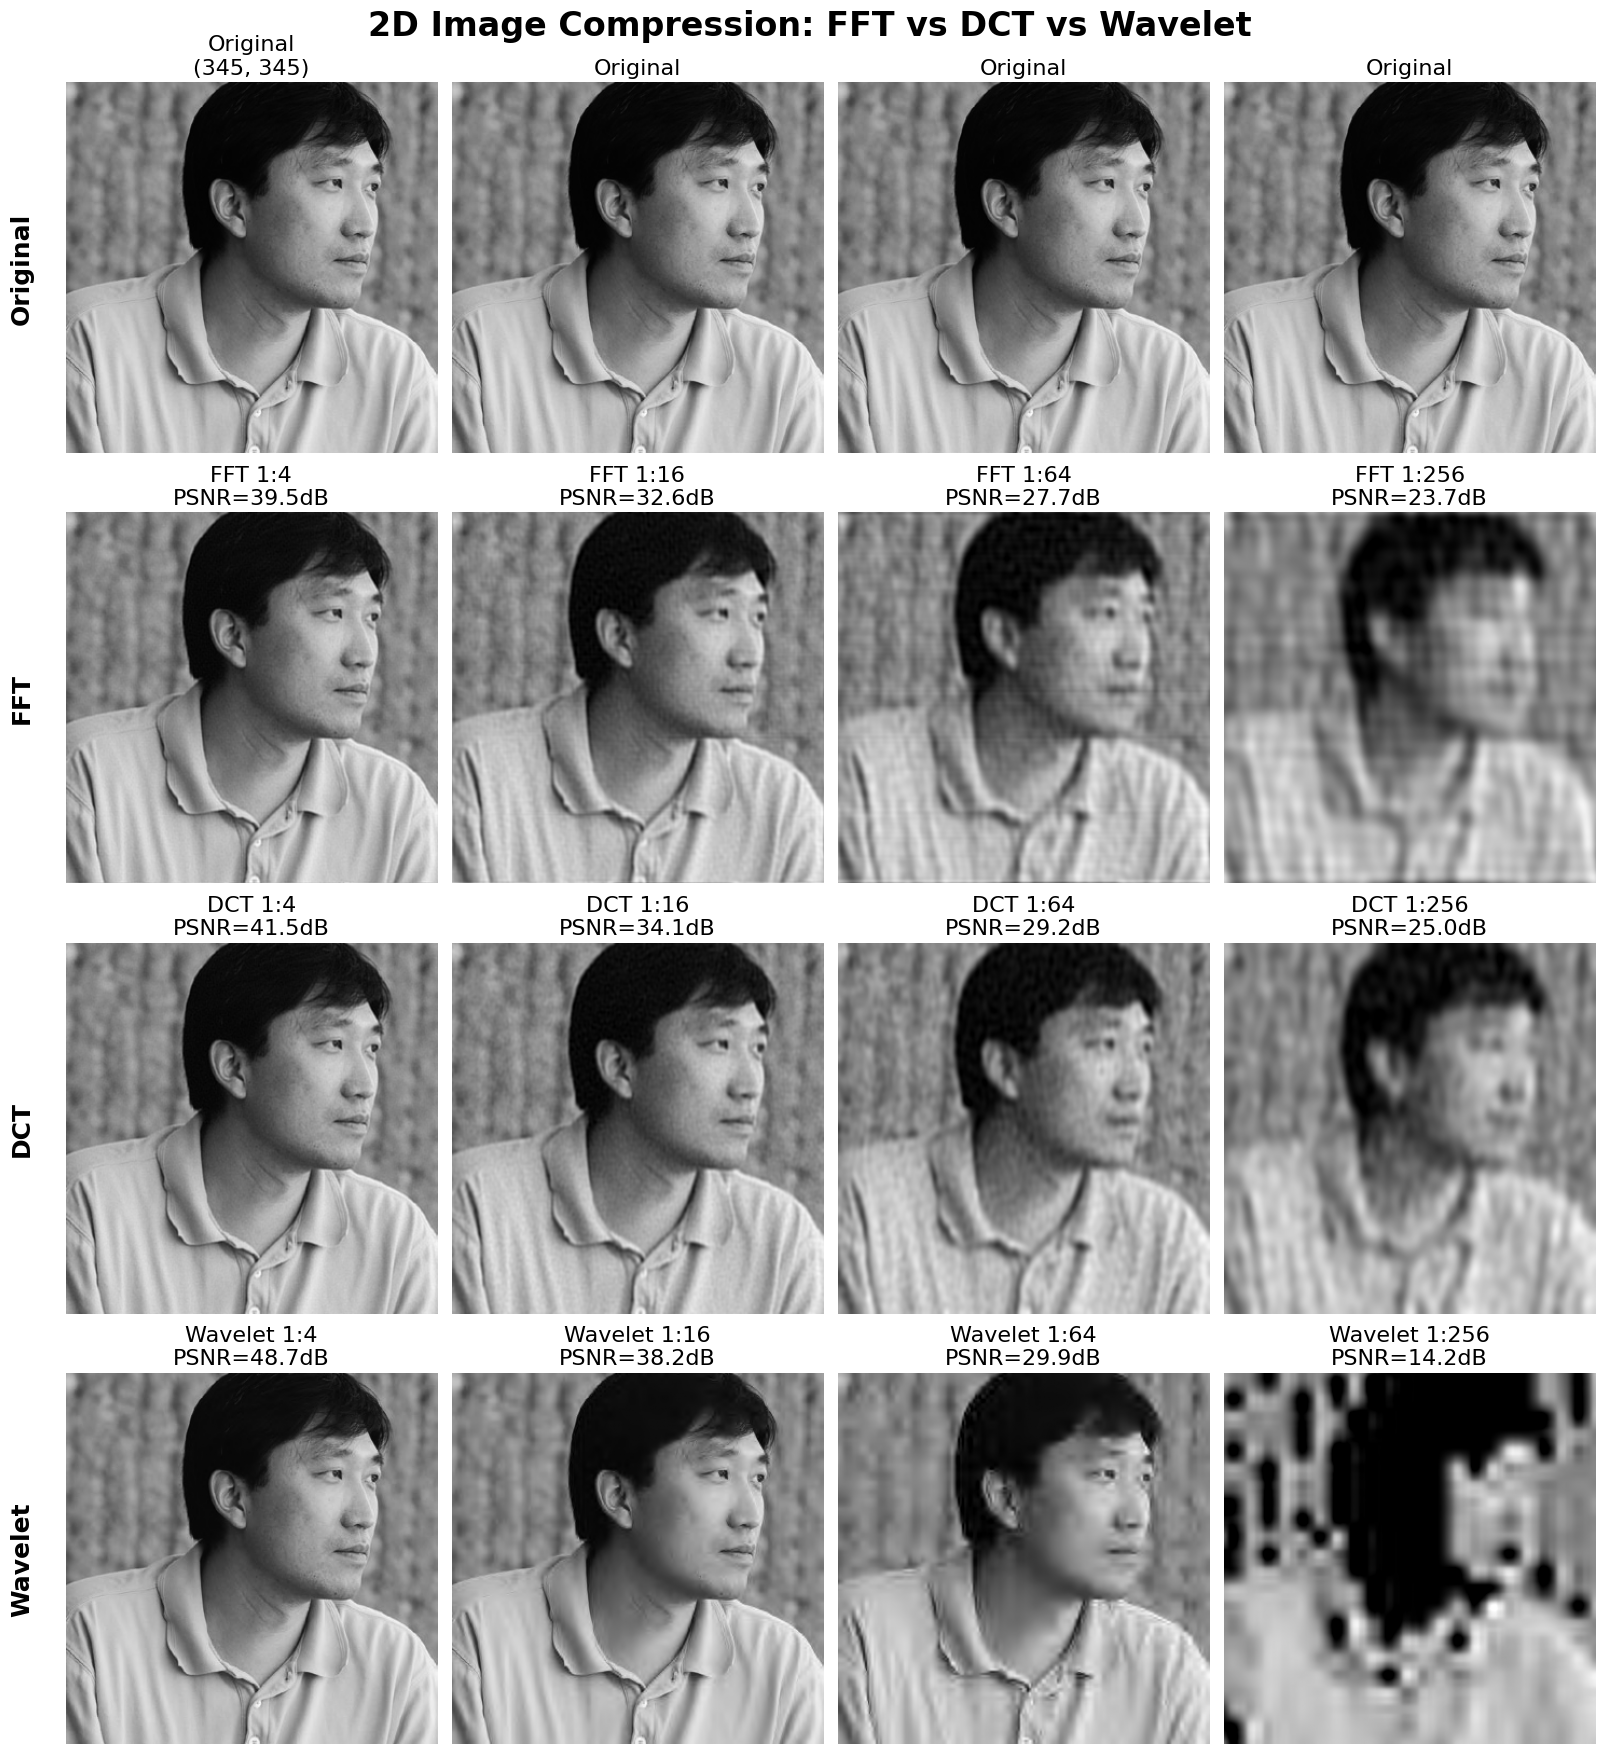

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


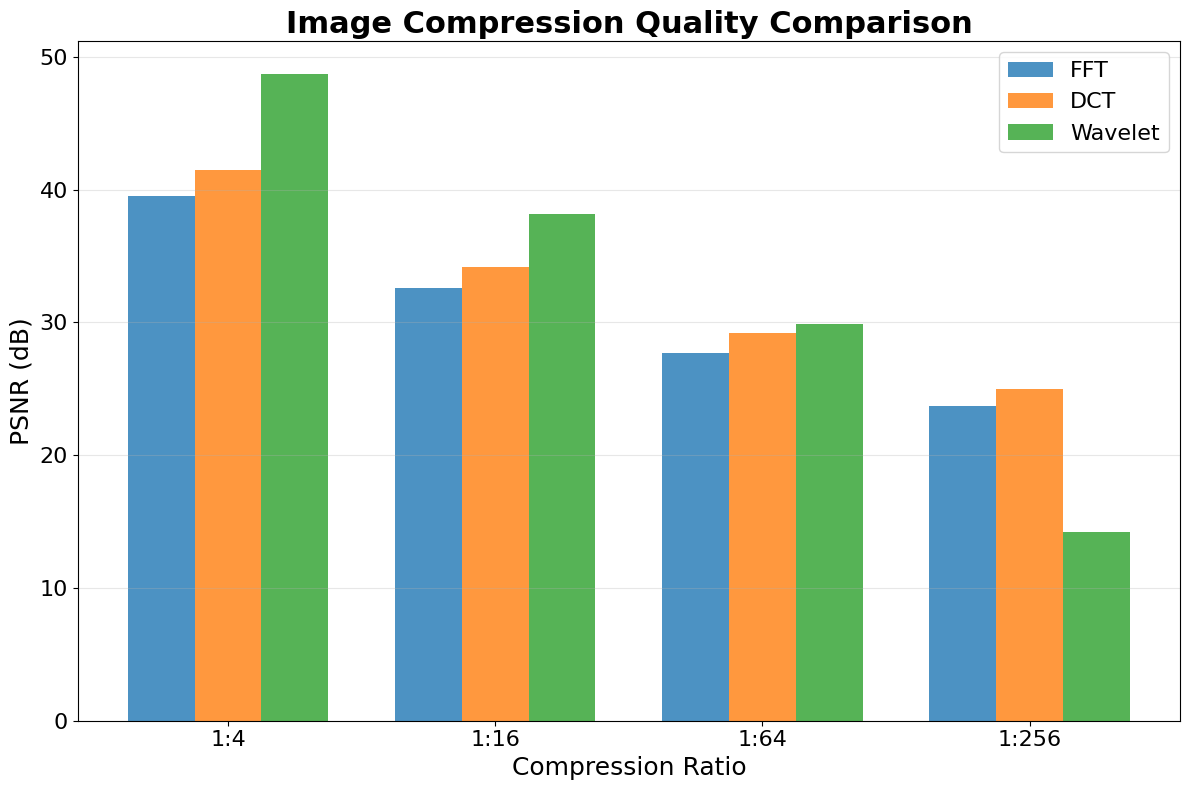

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


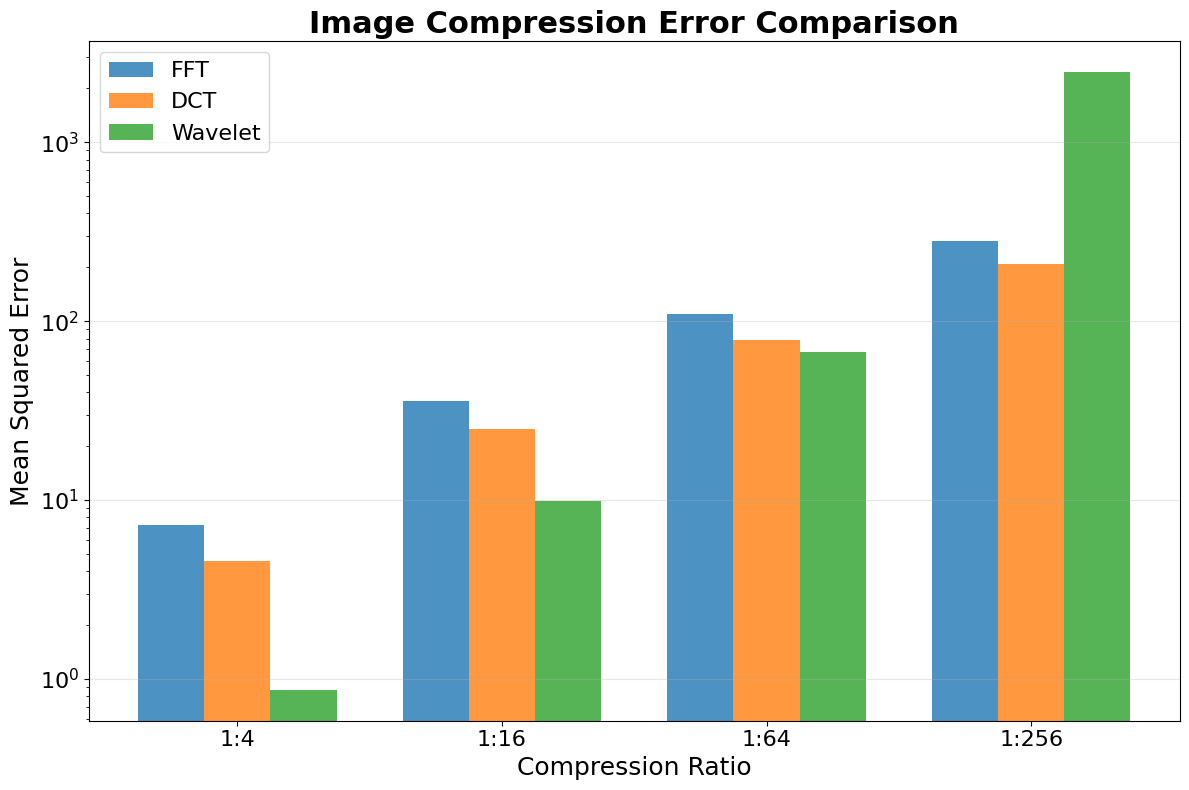

In [10]:
# Problem 5: 2D Image Compression using FFT, DCT, and Wavelet Transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import dct, idct, fft2, ifft2

# Read and convert image to grayscale (similar to MATLAB's imread and rgb2gray)
img_path = 'Shuang-Sean-Luan.jpg'
img_color = Image.open(img_path)
img_gray = img_color.convert('L')  # Convert to grayscale (rgb2gray equivalent)
img_array = np.array(img_gray, dtype=float)

print(f"Image shape: {img_array.shape}")
print(f"Image dtype: {img_array.dtype}")

# Display original image
plt.figure(figsize=(10, 8))
plt.imshow(img_array, cmap='gray')
plt.title('Original Grayscale Image', fontsize=20, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/original_image.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

# Define compression ratios
compression_ratios = [4, 16, 64, 256]

# ============================================================================
# 2D FFT COMPRESSION
# ============================================================================
def fft2_compress(image, compression_ratio):
    """
    Compress image using 2D FFT (similar to MATLAB's fft2)
    """
    # Forward 2D FFT
    fft_coeffs = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_coeffs)  # Shift zero frequency to center
    
    # Keep only the largest coefficients
    magnitudes = np.abs(fft_shifted)
    total_coeffs = magnitudes.size
    keep_coeffs = total_coeffs // compression_ratio
    threshold = np.sort(magnitudes.flatten())[-keep_coeffs]
    
    # Apply threshold
    fft_compressed = fft_shifted.copy()
    fft_compressed[magnitudes < threshold] = 0
    
    # Inverse FFT
    fft_ishifted = np.fft.ifftshift(fft_compressed)
    reconstructed = np.fft.ifft2(fft_ishifted).real
    
    return reconstructed, np.sum(magnitudes >= threshold)

# ============================================================================
# 2D DCT COMPRESSION
# ============================================================================
def dct2(image):
    """2D DCT (similar to MATLAB's dct2)"""
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def idct2(coeffs):
    """2D Inverse DCT (similar to MATLAB's idct2)"""
    return idct(idct(coeffs.T, norm='ortho').T, norm='ortho')

def dct2_compress(image, compression_ratio):
    """
    Compress image using 2D DCT
    """
    # Forward 2D DCT
    dct_coeffs = dct2(image)
    
    # Keep only the largest coefficients
    magnitudes = np.abs(dct_coeffs)
    total_coeffs = magnitudes.size
    keep_coeffs = total_coeffs // compression_ratio
    threshold = np.sort(magnitudes.flatten())[-keep_coeffs]
    
    # Apply threshold
    dct_compressed = dct_coeffs.copy()
    dct_compressed[magnitudes < threshold] = 0
    
    # Inverse DCT
    reconstructed = idct2(dct_compressed)
    
    return reconstructed, np.sum(magnitudes >= threshold)

# ============================================================================
# 2D WAVELET COMPRESSION
# ============================================================================
def dwt2_compress(image, compression_ratio, wavelet='db4', level=3):
    """
    Compress image using 2D Wavelet Transform (similar to MATLAB's dwt2)
    """
    # Forward 2D DWT
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    
    # Flatten all coefficients
    coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    
    # Keep only the largest coefficients
    magnitudes = np.abs(coeff_arr)
    total_coeffs = magnitudes.size
    keep_coeffs = total_coeffs // compression_ratio
    threshold = np.sort(magnitudes.flatten())[-keep_coeffs]
    
    # Apply threshold
    coeff_arr_compressed = coeff_arr.copy()
    coeff_arr_compressed[magnitudes < threshold] = 0
    
    # Reconstruct coefficients and image
    coeffs_compressed = pywt.array_to_coeffs(coeff_arr_compressed, coeff_slices, output_format='wavedec2')
    reconstructed = pywt.waverec2(coeffs_compressed, wavelet)
    
    # Ensure same size as original
    reconstructed = reconstructed[:image.shape[0], :image.shape[1]]
    
    return reconstructed, np.sum(magnitudes >= threshold)

# ============================================================================
# PERFORM COMPRESSION AND VISUALIZATION
# ============================================================================

# Storage for results
results = {
    'FFT': {'mse': [], 'psnr': [], 'kept_coeffs': []},
    'DCT': {'mse': [], 'psnr': [], 'kept_coeffs': []},
    'Wavelet': {'mse': [], 'psnr': [], 'kept_coeffs': []}
}

# Compute compressions
for ratio in compression_ratios:
    # FFT compression
    img_fft, kept_fft = fft2_compress(img_array, ratio)
    mse_fft = np.mean((img_array - img_fft) ** 2)
    psnr_fft = 10 * np.log10(255**2 / mse_fft) if mse_fft > 0 else float('inf')
    results['FFT']['mse'].append(mse_fft)
    results['FFT']['psnr'].append(psnr_fft)
    results['FFT']['kept_coeffs'].append(kept_fft)
    
    # DCT compression
    img_dct, kept_dct = dct2_compress(img_array, ratio)
    mse_dct = np.mean((img_array - img_dct) ** 2)
    psnr_dct = 10 * np.log10(255**2 / mse_dct) if mse_dct > 0 else float('inf')
    results['DCT']['mse'].append(mse_dct)
    results['DCT']['psnr'].append(psnr_dct)
    results['DCT']['kept_coeffs'].append(kept_dct)
    
    # Wavelet compression
    img_wavelet, kept_wavelet = dwt2_compress(img_array, ratio, wavelet='db4', level=4)
    mse_wavelet = np.mean((img_array - img_wavelet) ** 2)
    psnr_wavelet = 10 * np.log10(255**2 / mse_wavelet) if mse_wavelet > 0 else float('inf')
    results['Wavelet']['mse'].append(mse_wavelet)
    results['Wavelet']['psnr'].append(psnr_wavelet)
    results['Wavelet']['kept_coeffs'].append(kept_wavelet)

# Print results summary
print("\n" + "=" * 80)
print("2D IMAGE COMPRESSION RESULTS SUMMARY")
print("=" * 80)
print(f"{'Ratio':<10} {'Method':<10} {'MSE':<15} {'PSNR (dB)':<15} {'Coeffs Kept':<15}")
print("-" * 80)
for i, ratio in enumerate(compression_ratios):
    print(f"1:{ratio:<8} {'FFT':<10} {results['FFT']['mse'][i]:<15.2f} {results['FFT']['psnr'][i]:<15.2f} {results['FFT']['kept_coeffs'][i]:<15}")
    print(f"{'':10} {'DCT':<10} {results['DCT']['mse'][i]:<15.2f} {results['DCT']['psnr'][i]:<15.2f} {results['DCT']['kept_coeffs'][i]:<15}")
    print(f"{'':10} {'Wavelet':<10} {results['Wavelet']['mse'][i]:<15.2f} {results['Wavelet']['psnr'][i]:<15.2f} {results['Wavelet']['kept_coeffs'][i]:<15}")
    print("-" * 80)
print("=" * 80)

# ============================================================================
# VISUALIZATION: Grid of compressed images
# ============================================================================
fig, axes = plt.subplots(4, 4, figsize=(16, 18))
fig.suptitle('2D Image Compression: FFT vs DCT vs Wavelet', fontsize=24, fontweight='bold')

for col_idx, ratio in enumerate(compression_ratios):
    # Original image in first row
    if col_idx == 0:
        axes[0, col_idx].imshow(img_array, cmap='gray')
        axes[0, col_idx].set_title(f'Original\n{img_array.shape}', fontsize=16)
        axes[0, col_idx].axis('off')
    else:
        axes[0, col_idx].imshow(img_array, cmap='gray')
        axes[0, col_idx].set_title(f'Original', fontsize=16)
        axes[0, col_idx].axis('off')
    
    # FFT compression
    img_fft, _ = fft2_compress(img_array, ratio)
    axes[1, col_idx].imshow(img_fft, cmap='gray', vmin=0, vmax=255)
    axes[1, col_idx].set_title(f'FFT 1:{ratio}\nPSNR={results["FFT"]["psnr"][col_idx]:.1f}dB', fontsize=16)
    axes[1, col_idx].axis('off')
    
    # DCT compression
    img_dct, _ = dct2_compress(img_array, ratio)
    axes[2, col_idx].imshow(img_dct, cmap='gray', vmin=0, vmax=255)
    axes[2, col_idx].set_title(f'DCT 1:{ratio}\nPSNR={results["DCT"]["psnr"][col_idx]:.1f}dB', fontsize=16)
    axes[2, col_idx].axis('off')
    
    # Wavelet compression
    img_wavelet, _ = dwt2_compress(img_array, ratio, wavelet='db4', level=4)
    axes[3, col_idx].imshow(img_wavelet, cmap='gray', vmin=0, vmax=255)
    axes[3, col_idx].set_title(f'Wavelet 1:{ratio}\nPSNR={results["Wavelet"]["psnr"][col_idx]:.1f}dB', fontsize=16)
    axes[3, col_idx].axis('off')

# Add row labels
for i, label in enumerate(['Original', 'FFT', 'DCT', 'Wavelet']):
    axes[i, 0].text(-0.15, 0.5, label, transform=axes[i, 0].transAxes,
                    fontsize=18, fontweight='bold', va='center', rotation=90)

plt.tight_layout()
plt.savefig('figures/image_compression_comparison.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# PSNR COMPARISON PLOT
# ============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

x_pos = np.arange(len(compression_ratios))
width = 0.25

bars1 = ax.bar(x_pos - width, results['FFT']['psnr'], width, label='FFT', alpha=0.8)
bars2 = ax.bar(x_pos, results['DCT']['psnr'], width, label='DCT', alpha=0.8)
bars3 = ax.bar(x_pos + width, results['Wavelet']['psnr'], width, label='Wavelet', alpha=0.8)

ax.set_xlabel('Compression Ratio', fontsize=18)
ax.set_ylabel('PSNR (dB)', fontsize=18)
ax.set_title('Image Compression Quality Comparison', fontsize=22, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'1:{r}' for r in compression_ratios])
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=16)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('figures/image_compression_psnr.eps', format='eps', dpi=300)
plt.show()

# ============================================================================
# MSE COMPARISON PLOT
# ============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x_pos - width, results['FFT']['mse'], width, label='FFT', alpha=0.8)
bars2 = ax.bar(x_pos, results['DCT']['mse'], width, label='DCT', alpha=0.8)
bars3 = ax.bar(x_pos + width, results['Wavelet']['mse'], width, label='Wavelet', alpha=0.8)

ax.set_xlabel('Compression Ratio', fontsize=18)
ax.set_ylabel('Mean Squared Error', fontsize=18)
ax.set_title('Image Compression Error Comparison', fontsize=22, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'1:{r}' for r in compression_ratios])
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=16)
ax.grid(True, alpha=0.3, axis='y')
ax.set_yscale('log')

plt.tight_layout()
plt.savefig('figures/image_compression_mse.eps', format='eps', dpi=300)
plt.show()

## Problem 7
The following table shows the head-to-head results of the B1G Conference as of Saturday Oct 25, 2025. Note the lower triangular portion of the table is omitted since a game is between two teams. Also, note that the win-loss matrix is NOT symmetric. You can update your matrix by checking \url{https://www.espn.com/college-football/teams} and select “Big Ten” when you start working on this problem.

Please design a ranking algorithm of B1G schools like the Google Page Rank Algorithm and show your computation results. Does your calculation converge? If it doesn’t converge, can you explain why? 

How would you adjust your algorithm to accommodate the margin of wins and losses? Does it make any difference to your ranking results? 

Can you plot the social network between B1G schools, and see if any clusters emerge? 

Hint: you should treat each school as a vertex and if two schools played against each other, introduce an undirected edge between them.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Big Ten Conference Teams:
['ILL', 'IU', 'IOWA', 'MD', 'MSU', 'MICH', 'MINN', 'NEB', 'NU', 'ORE', 'OSU', 'PSU', 'PUR', 'RUTG', 'UCLA', 'USC', 'WASH', 'WISC']

Number of teams: 18

Win Matrix (rows beat columns):
      ILL   IU  IOWA   MD  MSU  MICH  MINN  NEB   NU  ORE  OSU  PSU  PUR  RUTG  UCLA  USC  WASH  WISC
ILL   0.0  1.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0  1.0   0.0   0.0
IU    0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0
IOWA  0.0  1.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0
MD    0.0  0.0   0.0  0.0  0.0   0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0   1.0   0.0  1.0   0.0   0.0
MSU   0.0  1.0   0.0  0.0  0.0   0.0   1.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0   1.0  1.0   0.0   0.0
MICH  0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  1.0   0.0   0.0
MINN  0.0  0.0   1.0  0.0  0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0   

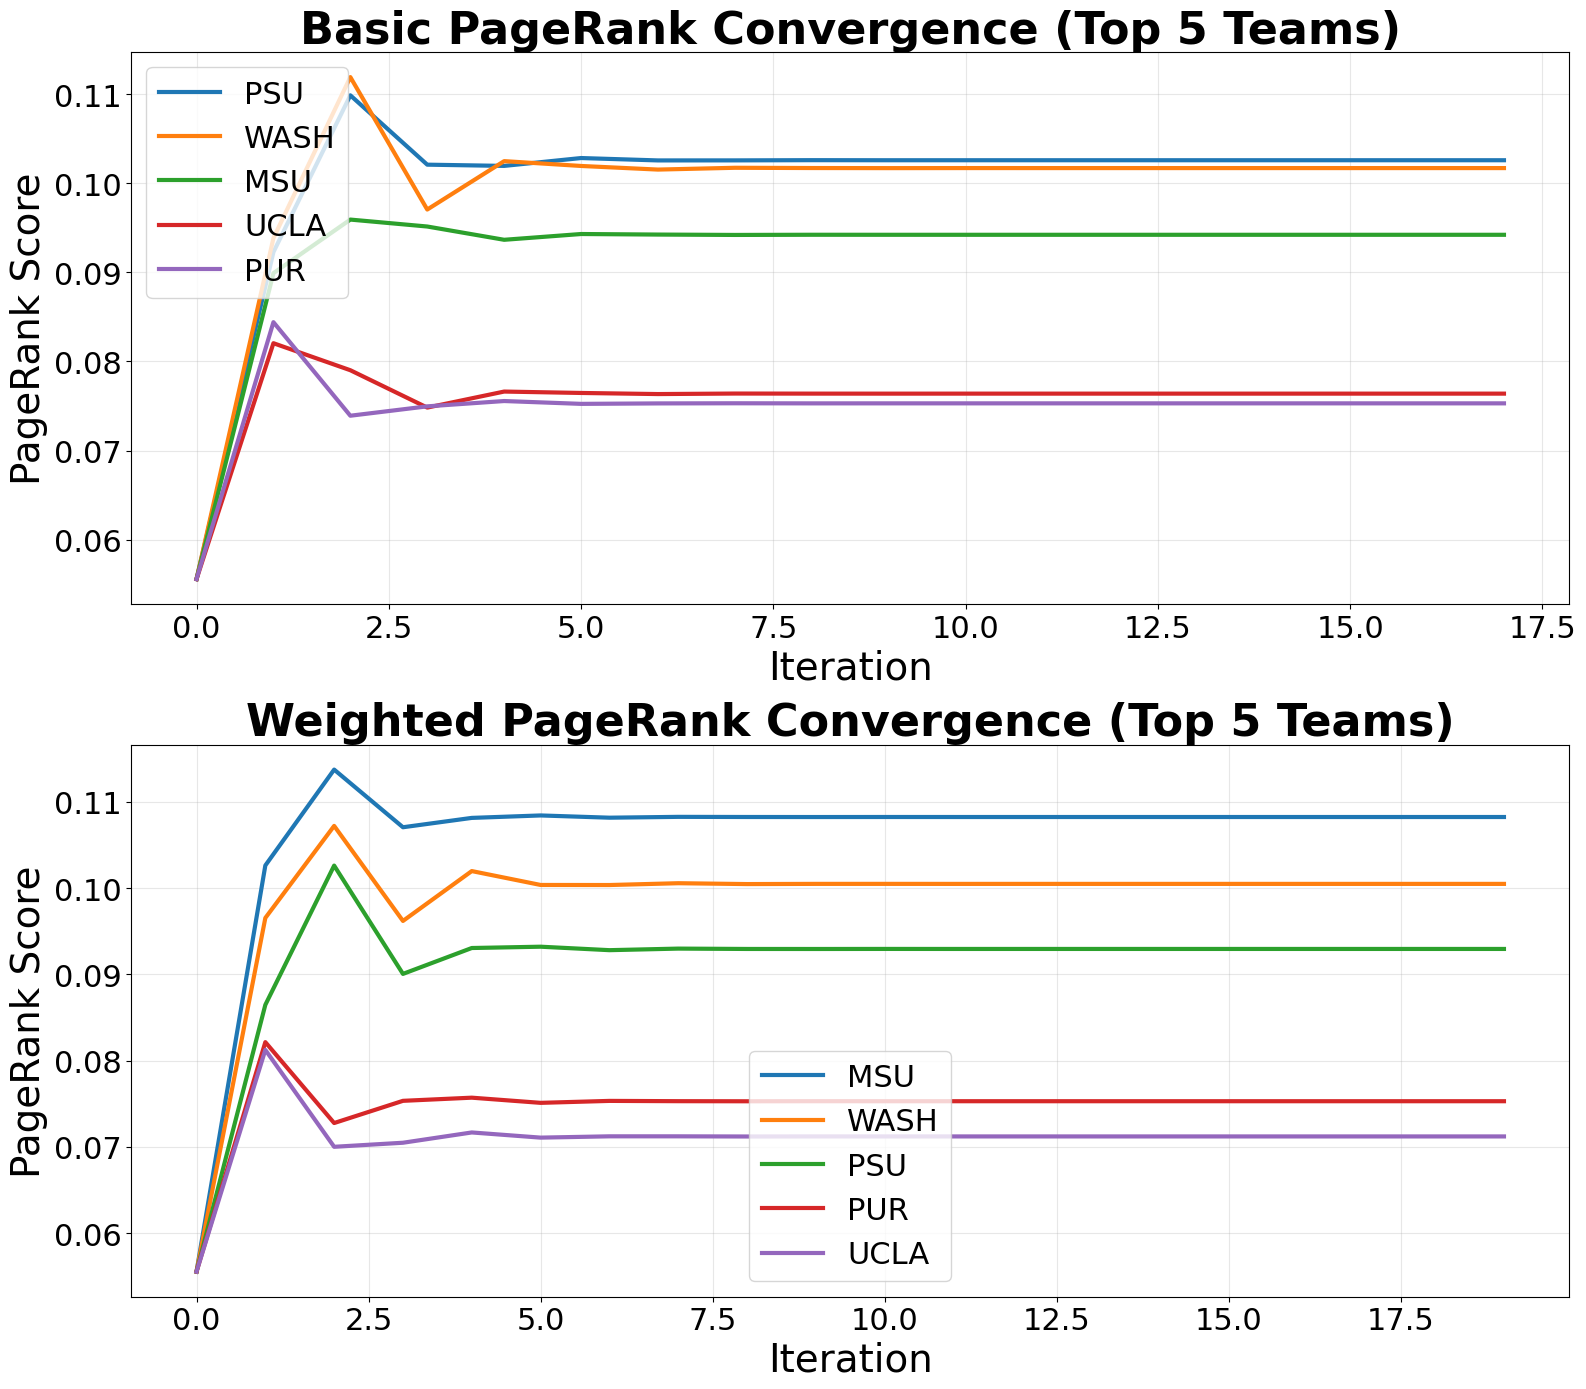

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NETWORK STATISTICS
Number of nodes (teams): 18
Number of edges (games played): 41
Network density: 0.268

(python-louvain not installed, skipping community detection)


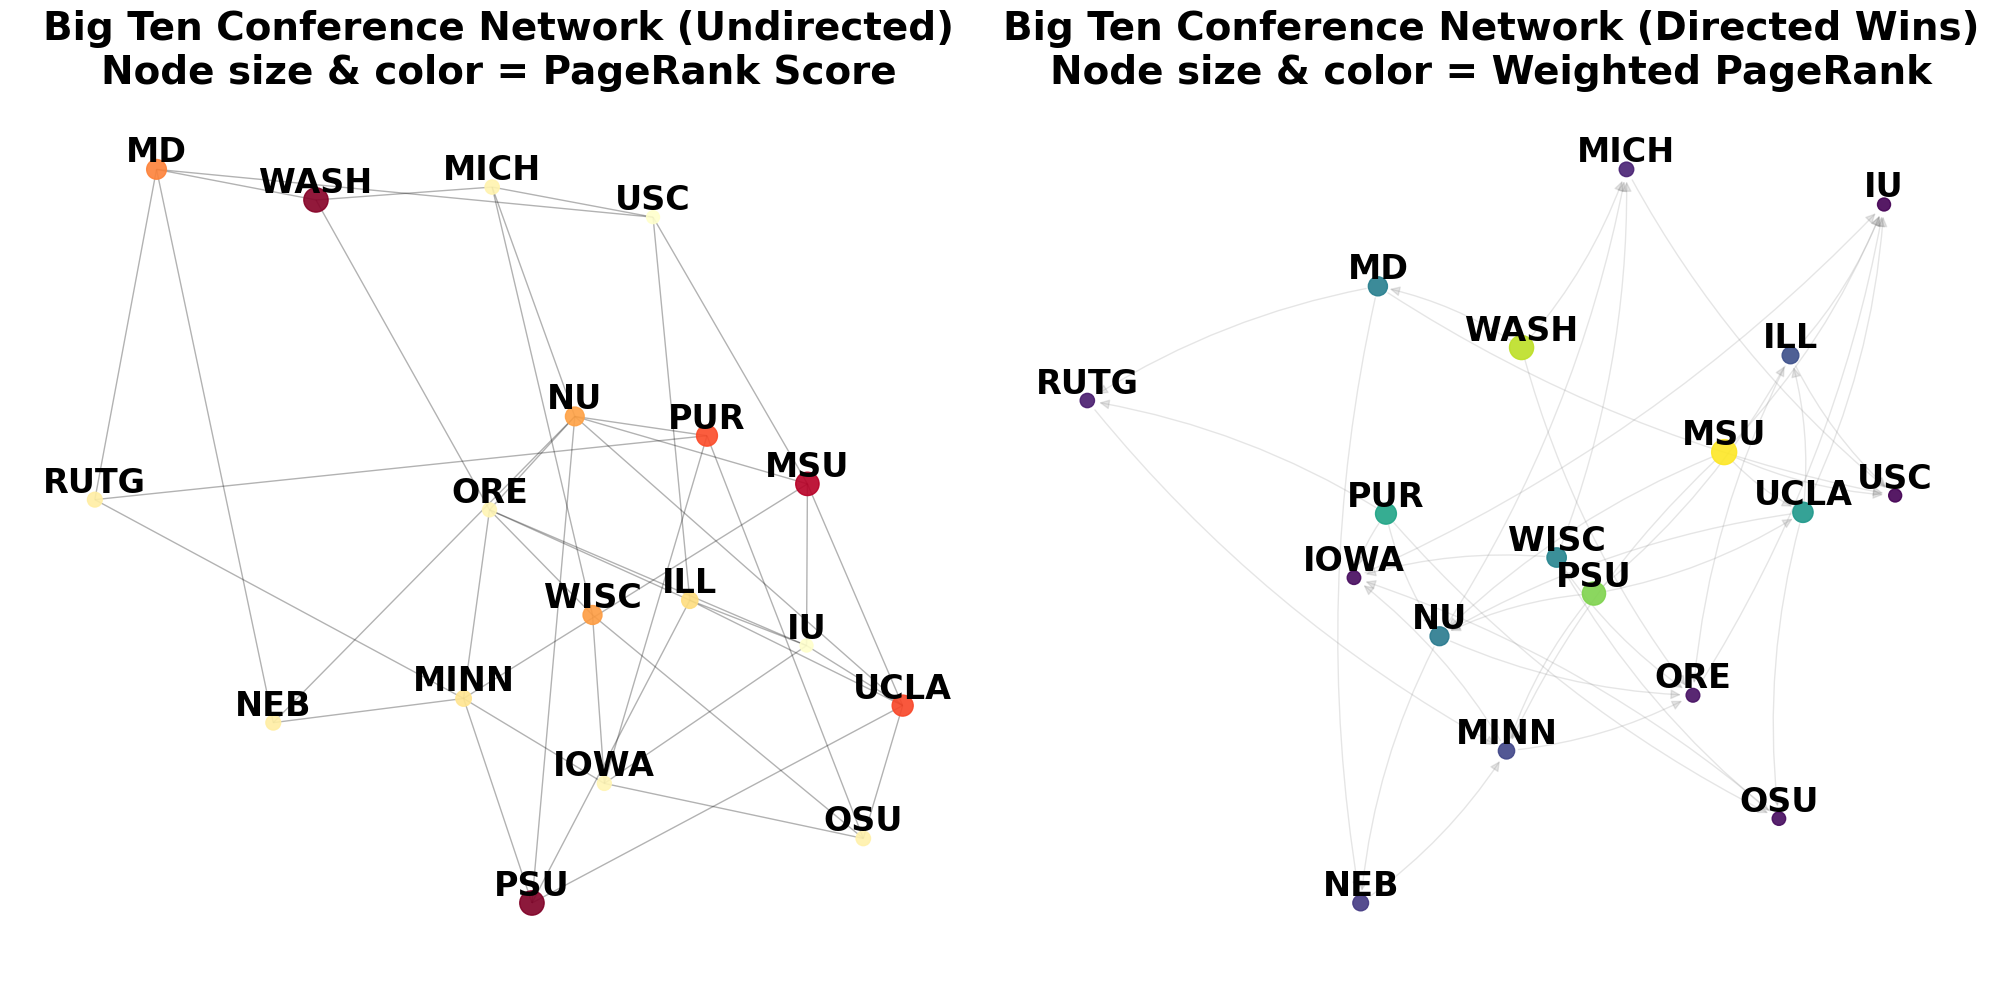

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


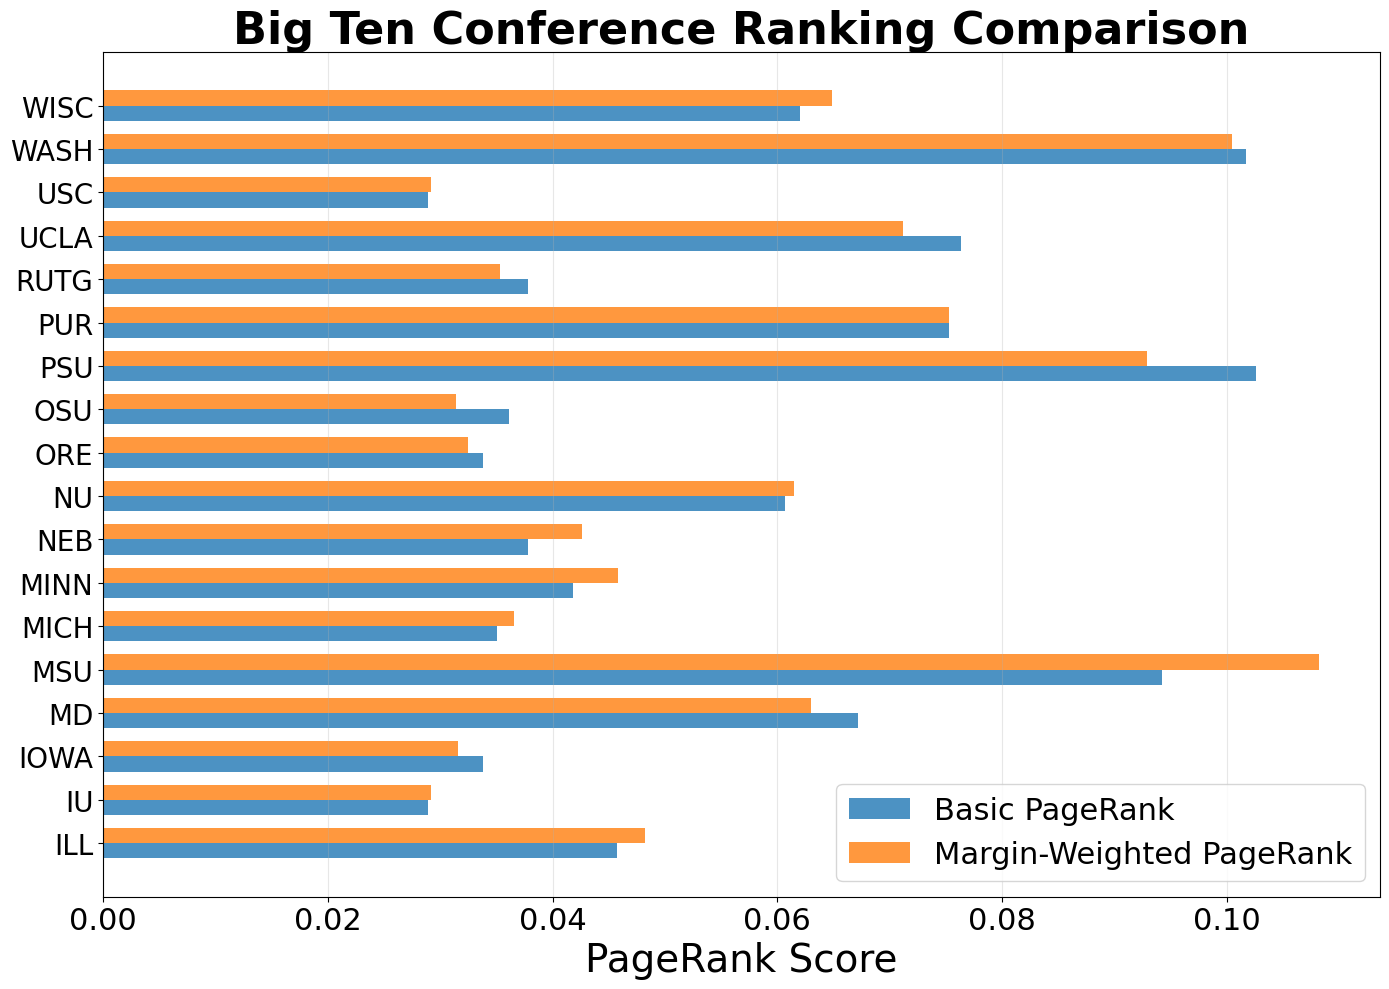


ANALYSIS COMPLETE


In [14]:
# Problem 7: Big Ten Conference Ranking using PageRank Algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Read the win-loss matrix data with error handling
df = pd.read_csv('matrix_data.csv', index_col=0, on_bad_lines='skip')
teams = df.columns.tolist()
n_teams = len(teams)

print("Big Ten Conference Teams:")
print(teams)
print(f"\nNumber of teams: {n_teams}")

# Parse the score data and create matrices
win_matrix = np.zeros((n_teams, n_teams))  # win_matrix[i,j] = 1 if team i beat team j
margin_matrix = np.zeros((n_teams, n_teams))  # margin_matrix[i,j] = score difference

for i, row_team in enumerate(teams):
    for j, col_team in enumerate(teams):
        if i != j:
            score_str = df.loc[row_team, col_team]
            if pd.notna(score_str) and score_str != '':
                # Parse score: "col_score-row_score"
                scores = score_str.split('-')
                col_score = int(scores[0])
                row_score = int(scores[1])
                
                # Determine winner (column team vs row team)
                if col_score > row_score:
                    # Column team (j) won against row team (i)
                    win_matrix[j, i] = 1
                    margin_matrix[j, i] = col_score - row_score
                else:
                    # Row team (i) won against column team (j)
                    win_matrix[i, j] = 1
                    margin_matrix[i, j] = row_score - col_score

print("\n" + "=" * 80)
print("Win Matrix (rows beat columns):")
print("=" * 80)
win_df = pd.DataFrame(win_matrix, index=teams, columns=teams)
print(win_df.to_string())

# Count wins and losses for each team
wins = win_matrix.sum(axis=1)
losses = win_matrix.sum(axis=0)
print("\n" + "=" * 80)
print("Win-Loss Records:")
print("=" * 80)
for i, team in enumerate(teams):
    print(f"{team:8s}: {int(wins[i])} wins, {int(losses[i])} losses")

# ============================================================================
# PAGERANK ALGORITHM (BASIC)
# ============================================================================
def pagerank(win_matrix, damping=0.85, max_iter=1000, tol=1e-8):
    """
    Implement PageRank algorithm for team ranking
    A win from team i to team j means team i "votes" for team j's strength
    """
    n = win_matrix.shape[0]
    
    # Create transition matrix: M[j,i] = probability of going from i to j
    # Normalize by number of wins (out-degree)
    M = win_matrix.copy().astype(float)
    out_degree = M.sum(axis=0)  # Number of teams each team beat
    
    # Handle teams with no wins (dangling nodes)
    for i in range(n):
        if out_degree[i] > 0:
            M[:, i] /= out_degree[i]
        else:
            # If a team has no wins, distribute equally to all teams
            M[:, i] = 1.0 / n
    
    # Add damping factor
    M = damping * M + (1 - damping) / n * np.ones((n, n))
    
    # Power iteration
    rank = np.ones(n) / n
    history = [rank.copy()]
    
    for iteration in range(max_iter):
        rank_new = M @ rank
        history.append(rank_new.copy())
        
        # Check convergence
        if np.linalg.norm(rank_new - rank, ord=1) < tol:
            print(f"PageRank converged after {iteration + 1} iterations")
            return rank_new, True, history
        
        rank = rank_new
    
    print(f"PageRank did NOT converge after {max_iter} iterations")
    return rank, False, history

# Run basic PageRank
print("\n" + "=" * 80)
print("BASIC PAGERANK ALGORITHM")
print("=" * 80)
rank_basic, converged_basic, history_basic = pagerank(win_matrix, damping=0.85)

# Sort teams by rank
ranking_basic = sorted(zip(teams, rank_basic), key=lambda x: x[1], reverse=True)

print("\nBasic PageRank Results:")
print("-" * 80)
print(f"{'Rank':<6} {'Team':<10} {'PageRank Score':<20} {'Wins':<6} {'Losses':<6}")
print("-" * 80)
for rank_idx, (team, score) in enumerate(ranking_basic, 1):
    team_idx = teams.index(team)
    print(f"{rank_idx:<6} {team:<10} {score:<20.6f} {int(wins[team_idx]):<6} {int(losses[team_idx]):<6}")

# ============================================================================
# MARGIN-WEIGHTED PAGERANK
# ============================================================================
def pagerank_weighted(win_matrix, margin_matrix, damping=0.85, max_iter=1000, tol=1e-8):
    """
    PageRank with margin of victory weights
    Larger margins give more "voting power"
    """
    n = win_matrix.shape[0]
    
    # Weight the win matrix by margin of victory
    # Use square root scaling to avoid over-weighting blowouts
    M = win_matrix * np.sqrt(np.abs(margin_matrix) + 1)  # sqrt to dampen large margins
    
    # Normalize
    out_degree = M.sum(axis=0)
    for i in range(n):
        if out_degree[i] > 0:
            M[:, i] /= out_degree[i]
        else:
            M[:, i] = 1.0 / n
    
    # Add damping
    M = damping * M + (1 - damping) / n * np.ones((n, n))
    
    # Power iteration
    rank = np.ones(n) / n
    history = [rank.copy()]
    
    for iteration in range(max_iter):
        rank_new = M @ rank
        history.append(rank_new.copy())
        
        if np.linalg.norm(rank_new - rank, ord=1) < tol:
            print(f"Margin-weighted PageRank converged after {iteration + 1} iterations")
            return rank_new, True, history
        
        rank = rank_new
    
    print(f"Margin-weighted PageRank did NOT converge after {max_iter} iterations")
    return rank, False, history

# Run margin-weighted PageRank
print("\n" + "=" * 80)
print("MARGIN-WEIGHTED PAGERANK ALGORITHM")
print("=" * 80)
rank_weighted, converged_weighted, history_weighted = pagerank_weighted(win_matrix, margin_matrix, damping=0.85)

ranking_weighted = sorted(zip(teams, rank_weighted), key=lambda x: x[1], reverse=True)

print("\nMargin-Weighted PageRank Results:")
print("-" * 80)
print(f"{'Rank':<6} {'Team':<10} {'PageRank Score':<20} {'Wins':<6} {'Losses':<6}")
print("-" * 80)
for rank_idx, (team, score) in enumerate(ranking_weighted, 1):
    team_idx = teams.index(team)
    print(f"{rank_idx:<6} {team:<10} {score:<20.6f} {int(wins[team_idx]):<6} {int(losses[team_idx]):<6}")

# Compare rankings
print("\n" + "=" * 80)
print("RANKING COMPARISON")
print("=" * 80)
print(f"{'Team':<10} {'Basic Rank':<12} {'Weighted Rank':<15} {'Difference':<10}")
print("-" * 80)
rank_dict_basic = {team: i+1 for i, (team, _) in enumerate(ranking_basic)}
rank_dict_weighted = {team: i+1 for i, (team, _) in enumerate(ranking_weighted)}
for team in teams:
    diff = rank_dict_basic[team] - rank_dict_weighted[team]
    print(f"{team:<10} {rank_dict_basic[team]:<12} {rank_dict_weighted[team]:<15} {diff:+<10}")

# ============================================================================
# CONVERGENCE ANALYSIS
# ============================================================================
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Plot convergence for basic PageRank
history_basic_arr = np.array(history_basic)
for i in range(min(5, n_teams)):  # Plot top 5 teams
    team_idx = teams.index(ranking_basic[i][0])
    axes[0].plot(history_basic_arr[:, team_idx], label=ranking_basic[i][0], linewidth=3)
axes[0].set_xlabel('Iteration', fontsize=28)
axes[0].set_ylabel('PageRank Score', fontsize=28)
axes[0].set_title('Basic PageRank Convergence (Top 5 Teams)', fontsize=32, fontweight='bold')
axes[0].legend(fontsize=22)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='both', labelsize=22)

# Plot convergence for weighted PageRank
history_weighted_arr = np.array(history_weighted)
for i in range(min(5, n_teams)):
    team_idx = teams.index(ranking_weighted[i][0])
    axes[1].plot(history_weighted_arr[:, team_idx], label=ranking_weighted[i][0], linewidth=3)
axes[1].set_xlabel('Iteration', fontsize=28)
axes[1].set_ylabel('PageRank Score', fontsize=28)
axes[1].set_title('Weighted PageRank Convergence (Top 5 Teams)', fontsize=32, fontweight='bold')
axes[1].legend(fontsize=22)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='both', labelsize=22)

plt.tight_layout()
plt.savefig('figures/pagerank_convergence.eps', format='eps', dpi=300)
plt.show()

# ============================================================================
# SOCIAL NETWORK VISUALIZATION
# ============================================================================

# Create undirected graph (as per hint)
G_undirected = nx.Graph()
G_undirected.add_nodes_from(teams)

# Add edges for teams that played against each other
for i, team1 in enumerate(teams):
    for j, team2 in enumerate(teams):
        if i < j:  # Only check upper triangle to avoid duplicates
            if win_matrix[i, j] == 1 or win_matrix[j, i] == 1:
                # Weight by total points scored in the game
                total_margin = abs(margin_matrix[i, j]) + abs(margin_matrix[j, i])
                G_undirected.add_edge(team1, team2, weight=total_margin)

# Also create directed graph for visualization
G_directed = nx.DiGraph()
G_directed.add_nodes_from(teams)
for i, team1 in enumerate(teams):
    for j, team2 in enumerate(teams):
        if win_matrix[i, j] == 1:
            G_directed.add_edge(team1, team2, weight=margin_matrix[i, j])

print("\n" + "=" * 80)
print("NETWORK STATISTICS")
print("=" * 80)
print(f"Number of nodes (teams): {G_undirected.number_of_nodes()}")
print(f"Number of edges (games played): {G_undirected.number_of_edges()}")
print(f"Network density: {nx.density(G_undirected):.3f}")

# Detect communities using Louvain algorithm
try:
    import community as community_louvain
    partition = community_louvain.best_partition(G_undirected)
    print(f"\nCommunities detected: {len(set(partition.values()))}")
    
    for comm_id in set(partition.values()):
        members = [team for team, comm in partition.items() if comm == comm_id]
        print(f"Community {comm_id + 1}: {', '.join(members)}")
except ImportError:
    print("\n(python-louvain not installed, skipping community detection)")
    partition = {team: 0 for team in teams}

# ============================================================================
# NETWORK VISUALIZATION
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Undirected network (as per hint)
pos = nx.spring_layout(G_undirected, k=2, iterations=50, seed=42)

# Color nodes by PageRank score
node_colors = [rank_basic[teams.index(team)] for team in G_undirected.nodes()]
node_sizes = [3000 * rank_basic[teams.index(team)] for team in G_undirected.nodes()]

nx.draw_networkx_nodes(G_undirected, pos, node_color=node_colors, node_size=node_sizes,
                       cmap='YlOrRd', ax=axes[0], alpha=0.9)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.3, ax=axes[0])
nx.draw_networkx_labels(G_undirected, pos, font_size=24, font_weight='bold', ax=axes[0],
                       verticalalignment='bottom')

axes[0].set_title('Big Ten Conference Network (Undirected)\nNode size & color = PageRank Score',
                  fontsize=28, fontweight='bold')
axes[0].axis('off')

# Directed network showing win relationships
pos2 = nx.spring_layout(G_directed, k=2, iterations=50, seed=42)
node_colors2 = [rank_weighted[teams.index(team)] for team in G_directed.nodes()]
node_sizes2 = [3000 * rank_weighted[teams.index(team)] for team in G_directed.nodes()]

nx.draw_networkx_nodes(G_directed, pos2, node_color=node_colors2, node_size=node_sizes2,
                       cmap='viridis', ax=axes[1], alpha=0.9)
nx.draw_networkx_edges(G_directed, pos2, alpha=0.2, edge_color='gray',
                       arrows=True, arrowsize=15, ax=axes[1], connectionstyle="arc3,rad=0.1")
nx.draw_networkx_labels(G_directed, pos2, font_size=24, font_weight='bold', ax=axes[1],
                       verticalalignment='bottom')

axes[1].set_title('Big Ten Conference Network (Directed Wins)\nNode size & color = Weighted PageRank',
                  fontsize=28, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('figures/big_ten_network.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# FINAL COMPARISON VISUALIZATION
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(teams))
width = 0.35

bars1 = ax.barh(x - width/2, [rank_basic[teams.index(t)] for t in teams], 
                width, label='Basic PageRank', alpha=0.8)
bars2 = ax.barh(x + width/2, [rank_weighted[teams.index(t)] for t in teams], 
                width, label='Margin-Weighted PageRank', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(teams, fontsize=20)
ax.set_xlabel('PageRank Score', fontsize=28)
ax.set_title('Big Ten Conference Ranking Comparison', fontsize=32, fontweight='bold')
ax.legend(fontsize=22)
ax.grid(True, alpha=0.3, axis='x')
ax.tick_params(axis='x', labelsize=22)

plt.tight_layout()
plt.savefig('figures/ranking_comparison.eps', format='eps', dpi=300)
plt.show()

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)